In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore", message="All-NaN slice encountered")


In [4]:
path='/Users/thomas/Documents/Data/esemble 1001-001'
ds=xr.open_mfdataset(path+'/*.nc')


In [5]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = (np.sin(dlat/2)*np.sin(dlat/2))+(np.cos(np.radians(lat1))*np.cos(np.radians(lat2))*np.sin(dlon/2)*np.sin(dlon/2))
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


# Drop NaNs from 'TLAT' and 'TLON' using numpy's np.isnan() function
lat = ds['TLAT'].where(~np.isnan(ds['TLAT']))
lon = ds['TLON'].where(~np.isnan(ds['TLON']))


# Ensure there are more than one latitude and longitude values
if lat.shape[0] > 1 and lat.shape[1] > 1 and lon.shape[0] > 1 and lon.shape[1] > 1:
    # Calculate distances along latitude and longitude dimensions and take the mean
    lat_res = haversine(lat[:-1, :-1], lon[:-1, :-1], lat[1:, 1:], lon[1:, 1:]).mean().values
    print(f'Mean grid spacing: {lat_res} km')
else:
    print('Insufficient data to calculate resolution.')

Mean grid spacing: 108.22207641601562 km


/opt/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/opt/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


In [6]:
import numpy as np
import xarray as xr

# Define the haversine function
def haversine(lat1, lon1, lat2, lon2):
    if np.isnan(lat1) or np.isnan(lon1) or np.isnan(lat2) or np.isnan(lon2):
        return np.nan

    R = 6371  # Radius of the earth in km
    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Vectorize the haversine function
haversine_vec = np.vectorize(haversine)


# Get the latitude and longitude coordinates
lat = ds['TLAT']
lon = ds['TLON']

# Ensure there are more than one latitude and longitude values
if lat.shape[0] > 1 and lat.shape[1] > 1 and lon.shape[0] > 1 and lon.shape[1] > 1:
    # Calculate distances along latitude and longitude dimensions and take the mean
    distances = xr.apply_ufunc(haversine_vec, lat[:-1, :-1], lon[:-1, :-1], lat[1:, 1:], lon[1:, 1:], dask="allowed")
    lat_res = np.nanmin(distances.values)
    print(f'Mean grid spacing: {lat_res} km')
else:
    print('Insufficient data to calculate resolution.')

Mean grid spacing: 52.60923151480082 km


In [7]:
a=np.nanmean(ds.tarea.values)

In [8]:
np.sqrt(a)

63995.184

In [9]:
aice=ds['aice']

In [10]:
# Define the region boundaries (replace these with your desired region)
#lat_min, lat_max = 60, 90
#lon_min, lon_max =0, 360

lat_min, lat_max = 50, 61
lon_min, lon_max =295, 305

# Create a mask for the region of interest
mask = ((aice.TLAT >= lat_min) & (aice.TLAT <= lat_max) &
        (aice.TLON >= lon_min) & (aice.TLON <= lon_max))

# Apply the mask to the aice variable
aice_region =aice.where(mask, drop=True)
aice_region

<xarray.DataArray 'aice' (time: 3012, nj: 29, ni: 12)>
dask.array<where, shape=(3012, 29, 12), dtype=float32, chunksize=(120, 29, 12), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 dask.array<chunksize=(29, 12), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(29, 12), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(29, 12), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(29, 12), meta=np.ndarray>
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          1
    long_name:      ice area  (aggregate)
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

In [11]:
#Hist
aice_1850_59=aice_region.sel(time=slice('1850-02-01','1860-01-01'))
aice_1860_69=aice_region.sel(time=slice('1860-02-01','1870-01-01'))
aice_1870_79=aice_region.sel(time=slice('1870-02-01','1880-01-01'))
aice_1880_89=aice_region.sel(time=slice('1880-02-01','1890-01-01'))
aice_1890_99=aice_region.sel(time=slice('1890-02-01','1900-01-01'))
aice_1900_09=aice_region.sel(time=slice('1900-02-01','1910-01-01'))
aice_1910_19=aice_region.sel(time=slice('1910-02-01','1920-01-01'))
aice_1920_29=aice_region.sel(time=slice('1920-02-01','1930-01-01'))
aice_1930_39=aice_region.sel(time=slice('1930-02-01','1940-01-01'))
aice_1940_49=aice_region.sel(time=slice('1940-02-01','1950-01-01'))
aice_1950_59=aice_region.sel(time=slice('1950-02-01','1960-01-01'))
aice_1960_69=aice_region.sel(time=slice('1960-02-01','1970-01-01'))
aice_1970_79=aice_region.sel(time=slice('1970-02-01','1980-01-01'))
aice_1980_89=aice_region.sel(time=slice('1980-02-01','1990-01-01'))
aice_1990_99=aice_region.sel(time=slice('1990-02-01','2000-01-01'))
aice_2000_09=aice_region.sel(time=slice('2000-02-01','2010-01-01'))
aice_2010_14=aice_region.sel(time=slice('2010-02-01','2015-01-01'))
#Future
aice_2015_24=aice_region.sel(time=slice('2015-02-01','2025-01-01'))
aice_2025_34=aice_region.sel(time=slice('2025-02-01','2035-01-01'))
aice_2035_44=aice_region.sel(time=slice('2035-02-01','2045-01-01'))
aice_2045_54=aice_region.sel(time=slice('2045-02-01','2055-01-01'))
aice_2055_64=aice_region.sel(time=slice('2055-02-01','2065-01-01'))
aice_2065_74=aice_region.sel(time=slice('2065-02-01','2075-01-01'))
aice_2075_84=aice_region.sel(time=slice('2075-02-01','2085-01-01'))
aice_2085_94=aice_region.sel(time=slice('2085-02-01','2095-01-01'))
aice_2095_100=aice_region.sel(time=slice('2095-02-01','2101-01-01'))

In [12]:
#monthly mean hist
aice_1850_59_monthly=aice_1850_59.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1860_69_monthly=aice_1860_69.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1870_79_monthly=aice_1870_79.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1880_89_monthly=aice_1880_89.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1890_99_monthly=aice_1890_99.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1900_09_monthly=aice_1900_09.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1910_19_monthly=aice_1910_19.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1920_29_monthly=aice_1920_29.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1930_39_monthly=aice_1930_39.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1940_49_monthly=aice_1940_49.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1950_59_monthly=aice_1950_59.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1960_69_monthly=aice_1960_69.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1970_79_monthly=aice_1970_79.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1980_89_monthly=aice_1980_89.groupby('time.month').mean('time').mean(('nj','ni'))
aice_1990_99_monthly=aice_1990_99.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2000_09_monthly=aice_2000_09.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2010_14_monthly=aice_2010_14.groupby('time.month').mean('time').mean(('nj','ni'))

#monthly mean future
aice_2015_24_monthly=aice_2015_24.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2025_34_monthly=aice_2025_34.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2035_44_monthly=aice_2035_44.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2045_54_monthly=aice_2045_54.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2055_64_monthly=aice_2055_64.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2065_74_monthly=aice_2065_74.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2075_84_monthly=aice_2075_84.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2085_94_monthly=aice_2085_94.groupby('time.month').mean('time').mean(('nj','ni'))
aice_2095_100_monthly=aice_2095_100.groupby('time.month').mean('time').mean(('nj','ni'))

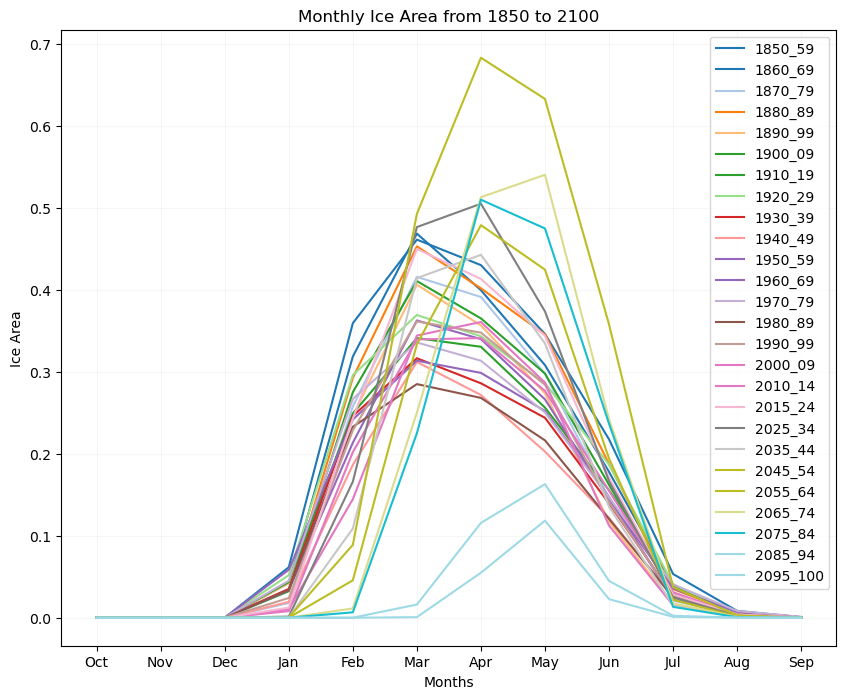

In [24]:
# Set xticks to represent months from January to December
fig,ax=plt.subplots(figsize=(10,8))
all_data=[aice_1850_59_monthly,aice_1860_69_monthly,aice_1870_79_monthly,aice_1880_89_monthly,aice_1890_99_monthly,
          aice_1900_09_monthly,aice_1910_19_monthly,aice_1920_29_monthly,aice_1930_39_monthly,aice_1940_49_monthly,
          aice_1950_59_monthly,aice_1960_69_monthly,aice_1970_79_monthly,aice_1980_89_monthly,aice_1990_99_monthly,
          aice_2000_09_monthly,aice_2010_14_monthly,aice_2015_24_monthly,aice_2025_34_monthly,aice_2035_44_monthly,
          aice_2045_54_monthly,aice_2055_64_monthly,aice_2065_74_monthly,aice_2075_84_monthly,aice_2085_94_monthly,
          aice_2095_100_monthly
]
        
labels = ['1850_59', '1860_69', '1870_79', '1880_89', '1890_99', '1900_09', '1910_19',
          '1920_29', '1930_39', '1940_49', '1950_59', '1960_69', '1970_79', '1980_89',
          '1990_99', '2000_09', '2010_14', '2015_24', '2025_34', '2035_44', '2045_54',
          '2055_64', '2065_74', '2075_84', '2085_94', '2095_100']

colors = plt.cm.get_cmap('tab20', len(labels)).colors

for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=colors[i], linestyle=linestyle,
             label=labels[i])
plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                             'Sep',])
plt.xlabel('Months')
plt.ylabel('Ice Area')
plt.title('Monthly Ice Area from 1850 to 2100')
plt.legend()
plt.grid(alpha=0.1)
plt.savefig('aa.jpg', dpi=300)
plt.show()

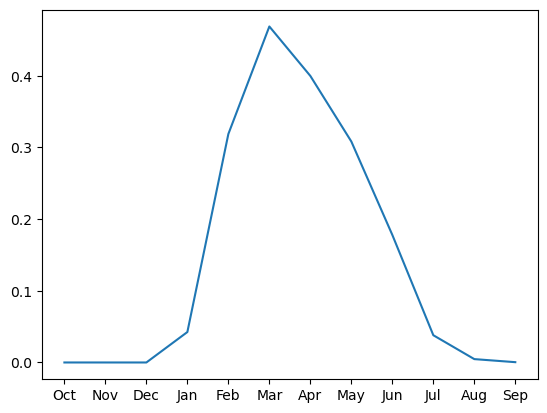

In [22]:
plt.plot(np.append(aice_1850_59_monthly[9:],aice_1850_59_monthly[:9]))
plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                             'Sep',]);

In [10]:
aice_1850_only = aice_1850_59.sel(time=slice('1850'))
aice_jan_1860 = aice_1850_59.sel(time='1860-01-01')
aice_1850 = xr.concat([aice_jan_1860, aice_1850_only], dim='time')
aice_1851 = aice_1850_59.sel(time=slice('1851-01', '1851-12'))
aice_1852 = aice_1850_59.sel(time=slice('1852-01', '1852-12'))
aice_1853 = aice_1850_59.sel(time=slice('1853-01', '1853-12'))
aice_1854 = aice_1850_59.sel(time=slice('1854-01', '1854-12'))
aice_1855 = aice_1850_59.sel(time=slice('1855-01', '1855-12'))
aice_1856 = aice_1850_59.sel(time=slice('1856-01', '1856-12'))
aice_1857 = aice_1850_59.sel(time=slice('1857-01', '1857-12'))
aice_1858 = aice_1850_59.sel(time=slice('1858-01', '1858-12'))
aice_1859 = aice_1850_59.sel(time=slice('1859-01', '1859-12'))

In [11]:
# Generate a list of distinct colors


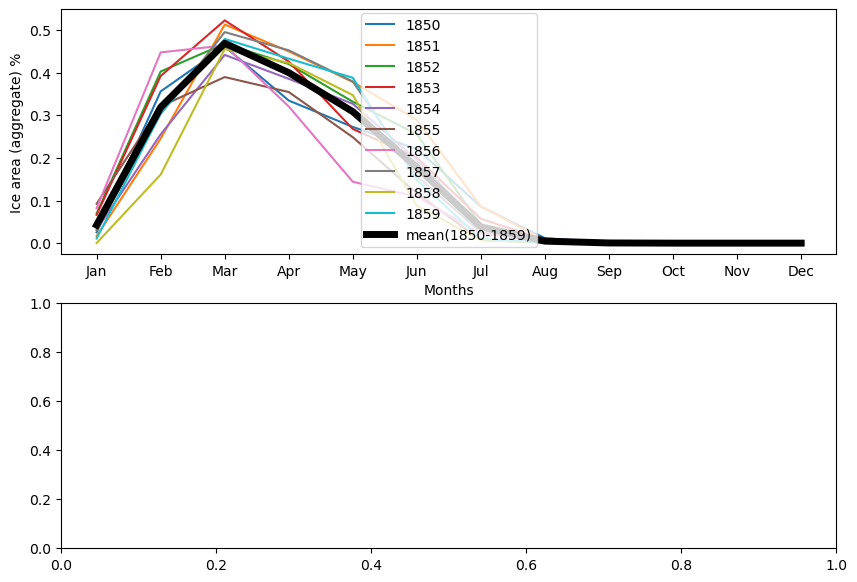

In [12]:
fig, ax=plt.subplots(2,1, figsize=(10,7))

ax[0].plot(np.arange(0,12), aice_1850.mean(('nj','ni')), label='1850')
ax[0].plot(np.arange(0,12), aice_1851.mean(('nj','ni')), label='1851')
ax[0].plot(np.arange(0,12), aice_1852.mean(('nj','ni')), label='1852')
ax[0].plot(np.arange(0,12), aice_1853.mean(('nj','ni')), label='1853')
ax[0].plot(np.arange(0,12), aice_1854.mean(('nj','ni')), label='1854')
ax[0].plot(np.arange(0,12), aice_1855.mean(('nj','ni')), label='1855')
ax[0].plot(np.arange(0,12), aice_1856.mean(('nj','ni')), label='1856')
ax[0].plot(np.arange(0,12), aice_1857.mean(('nj','ni')), label='1857')
ax[0].plot(np.arange(0,12), aice_1858.mean(('nj','ni')), label='1858')
ax[0].plot(np.arange(0,12), aice_1859.mean(('nj','ni')), label='1859')
ax[0].plot(np.arange(0,12), aice_1850_59_monthly, label='mean(1850-1859)', color='black', linewidth=5)
ax[0].legend()
ax[0].set_xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax[0].set_ylabel('Ice area (aggregate) %')
ax[0].set_xlabel('Months');

In [13]:
aice_1850.mean(('nj','ni'))[:11]

<xarray.DataArray 'aice' (time: 11)>
dask.array<getitem, shape=(11,), dtype=float32, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1860-01-01 00:00:00 ... 1850-11-01 00:00:00

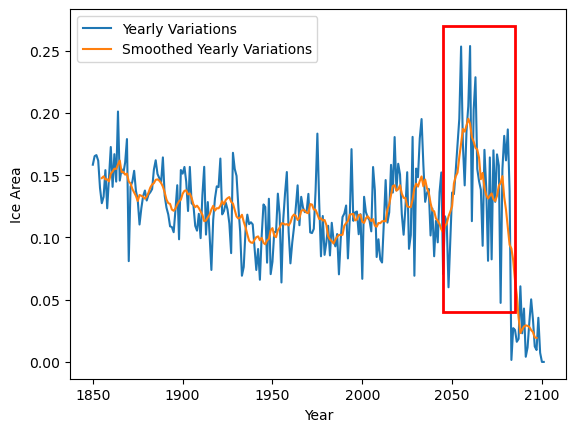

In [14]:
fig, ax=plt.subplots()
# Compute the yearly mean ice area
yearly_mean = aice_region.mean(('nj', 'ni')).groupby('time.year').mean('time')

# Calculate the mean across all years
overall_mean = yearly_mean.mean('year')
# Create an array with the same size as the number of years with the overall mean value
mean_line = np.full_like(yearly_mean, overall_mean)
# Plot the yearly variations and the mean line
ax.plot(yearly_mean.year, yearly_mean, label='Yearly Variations')
#plt.plot(yearly_mean.year, mean_line, label='Mean Variation', linestyle='--')
ax.plot(yearly_mean.year, yearly_mean.rolling(year=10, center=True).mean(), label='Smoothed Yearly Variations')
rect=ax.add_patch(Rectangle((2045, 0.04), 40, 0.23, edgecolor='red',facecolor='none',lw=2))
rect.set_zorder(10)
plt.xlabel('Year')
plt.ylabel('Ice Area')
plt.legend()
plt.show()

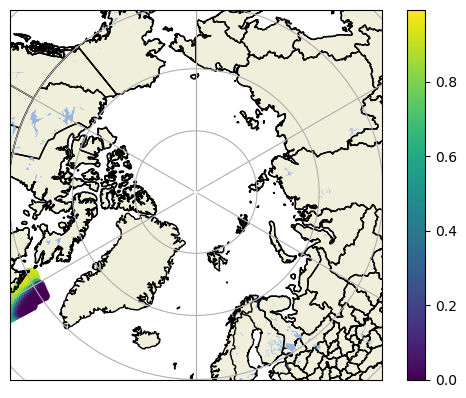

In [15]:
lon=aice_1850_59.TLON
lat=aice_1850_59.TLAT
lon = lon.where(np.isfinite(lon), 0)
lat = lat.where(np.isfinite(lat), 0)

data=aice_1850_59.groupby('time.month').mean('time').max('month')
# Replace NaN values with a suitable value (e.g., 0 or a specified fill value) before computing the mean and max
fig, ax=plt.subplots( subplot_kw={'projection':ccrs.NorthPolarStereo()})
cb0=ax.scatter(lon, lat, c=data, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([0,360,60,90],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)

plt.colorbar(cb0, ax=ax)
gridlines = ax.gridlines(draw_labels=False)

In [16]:
print("Non-finite values in lon array:", np.any(np.isnan(lon)) or np.any(np.isinf(lon)))
print("Non-finite values in lat array:", np.any(np.isnan(lat)) or np.any(np.isinf(lat)))


Non-finite values in lon array: <xarray.DataArray 'TLON' ()>
dask.array<any-aggregate, shape=(), dtype=bool, chunksize=(), chunktype=numpy.ndarray>
Non-finite values in lat array: <xarray.DataArray 'TLAT' ()>
dask.array<any-aggregate, shape=(), dtype=bool, chunksize=(), chunktype=numpy.ndarray>


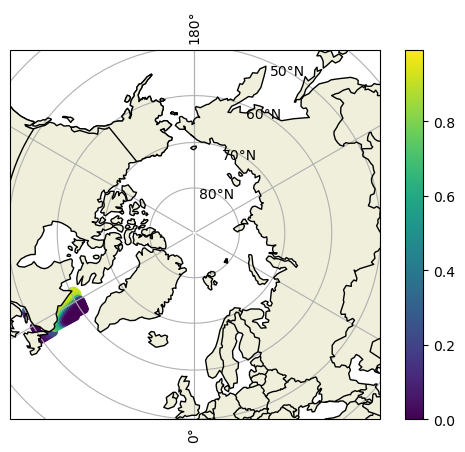

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Replace the following lines with your actual data
#lon = aice_region.TLON
#lat = aice_region.TLAT
# data = aice_1850_59.fillna(0).groupby('time.month').mean('time').max('month')

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.NorthPolarStereo()})

ax.coastlines(zorder=30)
ax.set_extent([0, 360, 50, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=2)
ax.add_feature(cfeature.STATES,)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS, zorder=21)



# Define the contour levels
levels = np.linspace(data.min(), data.max(), 10)

# Plot the data using contourf, passing the 'levels' argument
cb = ax.scatter(lon, lat, c=data, transform=ccrs.PlateCarree())
plt.colorbar(cb, ax=ax)
gridlines = ax.gridlines(draw_labels=True)
plt.show()

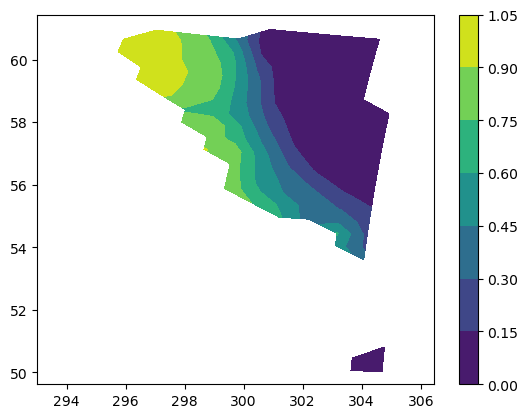

In [18]:
plt.contourf(lon, lat, aice_region[2,...])
plt.colorbar()

In [16]:
p='/Users/thomas/Documents/Data'
file='/icethick-esemble 1001-001/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cice.h.hi.185001-185912.nc'
sit=xr.open_dataset(p+file)
sit

<xarray.Dataset>
Dimensions:      (nj: 384, ni: 320, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, time: 120, d2: 2)
Coordinates:
    TLON         (nj, ni) float32 ...
    TLAT         (nj, ni) float32 ...
    ULON         (nj, ni) float32 ...
    ULAT         (nj, ni) float32 ...
  * time         (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/21)
    NCAT         (nc) float32 ...
    VGRDi        (nkice) float32 ...
    VGRDs        (nksnow) float32 ...
    VGRDb        (nkbio) float32 ...
    tmask        (nj, ni) float32 ...
    tarea        (nj, ni) float32 ...
    ...           ...
    lont_bounds  (nj, ni, nvertices) float32 ...
    latt_bounds  (nj, ni, nvertices) float32 ...
    lonu_bounds  (nj, ni, nvertices) float32 ...
    latu_bounds  (nj, ni, nvertices) float32 ...
    time_bounds  (time, d2) object ...
    hi           (time, nj, ni) float32 ...
Attributes:
    title:             b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 18500201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2020-01-31 at 16:34
    io_flavor:         io_pio

In [17]:
sit=sit.hi
sit

<xarray.DataArray 'hi' (time: 120, nj: 384, ni: 320)>
[14745600 values with dtype=float32]
Coordinates:
    TLON     (nj, ni) float32 ...
    TLAT     (nj, ni) float32 ...
    ULON     (nj, ni) float32 ...
    ULAT     (nj, ni) float32 ...
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          m
    long_name:      grid cell mean ice thickness
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

In [18]:
lat_min, lat_max = 50, 90
lon_min, lon_max =0, 360 #65W & 55W

# Create a mask for Labrador coast 
mask = ((sit.TLAT >= lat_min) & (sit.TLAT <= lat_max) &
        (sit.TLON >= lon_min) & (sit.TLON <= lon_max))

# Apply the mask to the aice variable
sit =sit.where(mask, drop=True)
sit

<xarray.DataArray 'hi' (time: 120, nj: 80, ni: 320)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    TLON     (nj, ni) float32 320.5 321.6 322.7 323.8 324.9 ... nan nan nan nan
    TLAT     (nj, ni) float32 40.82 40.82 40.83 40.83 40.84 ... nan nan nan nan
    ULON     (nj, ni) float32 321.1 322.2 323.3 324.4 325.5 ... nan nan nan nan
    ULAT     (nj, ni) float32 41.03 41.03 41.04 41.04 41.05 ... nan nan nan nan
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          m
    long_name:      grid cell mean ice thickness
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

In [19]:
sit1=sit.groupby('time.month').mean('time').mean(('nj','ni'))

In [20]:
sit1

<xarray.DataArray 'hi' (month: 12)>
array([1.0829262 , 1.2219392 , 1.3431522 , 1.442882  , 1.5207794 ,
       1.5339955 , 1.4384415 , 1.1779214 , 0.9202798 , 0.8194305 ,
       0.84895027, 0.9495628 ], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

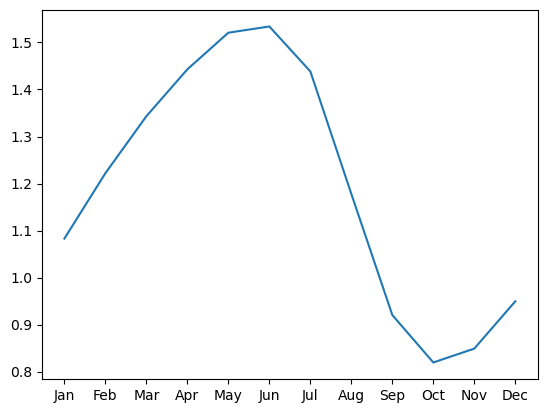

In [21]:
plt.plot(sit1)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [ ]:
# Define a mapping from the original values to the new values
mapping = {
    1: 0.05,   # Less than 1/10 (open water)
    2: 0.00, # Bergy Water
    10: 0.1,   # 1/10
    20: 0.2,   # 2/10
    # ...
    90: 0.9,   # 9/10
    91: 0.95,  # 9/10-10/10 or 9+/10
    92: 1,     # 10/10
    98: 0,     # Ice Free
}

In [ ]:
mapped_func = np.vectorize(lambda x: mapping.get(x, np.nan))
b = mapped_func(a)

In [ ]:
c = np.array([mapping.get(x, np.nan) for x in a])

print(c)

In [ ]:
#print(np.nanmin(obs_area.values), np.nanmax(obs_area.values))
#np.set_printoptions(threshold=np.inf)
#print(sorted (set(array1)))
#np.savetxt('num.txt', array)

Projection Information
Projection: Lambert Conformal Conic
Units: Metres
Spheroid: Clarke 1866
Datum: NAD27
1st Standard Parallel: 49 0 0.000
2nd Standard Parallel: 77 0 0.000
Central Meridian: -100 0 0.000
Latitude of Projections Origin: 40 0 0.000
False Easting: 0.000
False Northing: 0.00

In [ ]:
import xarray as xr

# make sure ds.CT is in fraction not in percentage
sea_ice_fraction = ds.CT / 100 if ds.CT.max() > 1 else ds.CT 

# compute sea ice area
sea_ice_area = (sea_ice_fraction * ds.area).sum(dim=['x', 'y'])

# if you want to exclude cells where sea_ice_fraction is nan
sea_ice_area = (sea_ice_fraction * ds.area).where(~xr.isnan(sea_ice_fraction)).sum(dim=['x', 'y'])


In [ ]:
new_array=[]
start_time=time.time()
for i in CT.values.flatten():
    #if np.isnan(i):
        #pass
    if i < 2:
        new_array.append(i)
end_time=time.time()
elapsed_time = end_time - start_time

# Convert seconds to hours, minutes, seconds
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")
print(sorted (set(new_array)))

In [ ]:
aice_1850.mean().values
em=[]
for i in range (12):
    data=aice_1850[i].mean().values
    em.append(data)